In [3]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

In [4]:
#import the dataset
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [5]:
#visualize the first records of the dataset
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#General description of the dataset
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
#Data types of the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [8]:
#save a new df to modify
creditM = credit.copy()

In [9]:
#remove the ID column
creditM = creditM.drop('ID', 1)

In [10]:
#rename the default payment next month column
creditM = creditM.rename(columns = {"default payment next month":"DefaultPaymentNextMonth"}) 

In [11]:
#change data type of: SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 and default payment next month
creditM['SEX'] = creditM['SEX'].astype('category')
creditM['EDUCATION'] = creditM['EDUCATION'].astype('category')
creditM['MARRIAGE'] = creditM['MARRIAGE'].astype('category')
creditM['PAY_0'] = creditM['PAY_0'].astype('category')
creditM['PAY_2'] = creditM['PAY_2'].astype('category')
creditM['PAY_3'] = creditM['PAY_3'].astype('category')
creditM['PAY_4'] = creditM['PAY_4'].astype('category')
creditM['PAY_5'] = creditM['PAY_5'].astype('category')
creditM['PAY_6'] = creditM['PAY_6'].astype('category')
creditM['DefaultPaymentNextMonth'] = creditM['DefaultPaymentNextMonth'].astype('category')

In [12]:
#Data types of the modified dataset
creditM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null category
EDUCATION                  30000 non-null category
MARRIAGE                   30000 non-null category
AGE                        30000 non-null int64
PAY_0                      30000 non-null category
PAY_2                      30000 non-null category
PAY_3                      30000 non-null category
PAY_4                      30000 non-null category
PAY_5                      30000 non-null category
PAY_6                      30000 non-null category
BILL_AMT1                  30000 non-null int64
BILL_AMT2                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT4                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
BILL_AMT6                  30000 non-null int64
PAY_AMT1                   30000 non-null int64


In [13]:
#Correlation Map
corr_matrix  = creditM.corr()

corr_matrix.style.background_gradient(cmap='coolwarm')

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1,0.144713,0.28543,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1,0.0562385,0.0542831,0.0537097,0.0513531,0.049345,0.0476127,0.0261467,0.0217849,0.0292474,0.021379,0.02285,0.0194782
BILL_AMT1,0.28543,0.0562385,1,0.951484,0.892279,0.860272,0.829779,0.80265,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.0542831,0.951484,1,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.0537097,0.892279,0.928326,1,0.923969,0.88391,0.85332,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.0513531,0.860272,0.892482,0.923969,1,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.88391,0.940134,1,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.0476127,0.80265,0.831594,0.85332,0.900941,0.946197,1,0.199965,0.172663,0.23377,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.0261467,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.0217849,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1,0.24477,0.180107,0.180908,0.157634


In [14]:
#remove the highly correlated columns
creditM = creditM.drop(['BILL_AMT2', 'BILL_AMT4','BILL_AMT6'], axis=1)

In [15]:
#Data types of the modified dataset
creditM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
LIMIT_BAL                  30000 non-null int64
SEX                        30000 non-null category
EDUCATION                  30000 non-null category
MARRIAGE                   30000 non-null category
AGE                        30000 non-null int64
PAY_0                      30000 non-null category
PAY_2                      30000 non-null category
PAY_3                      30000 non-null category
PAY_4                      30000 non-null category
PAY_5                      30000 non-null category
PAY_6                      30000 non-null category
BILL_AMT1                  30000 non-null int64
BILL_AMT3                  30000 non-null int64
BILL_AMT5                  30000 non-null int64
PAY_AMT1                   30000 non-null int64
PAY_AMT2                   30000 non-null int64
PAY_AMT3                   30000 non-null int64
PAY_AMT4                   30000 non-null int64


In [17]:
# 1. Select the features

features = creditM.drop('DefaultPaymentNextMonth', 1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT5,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,2682,3455,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,13559,14948,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,49291,28959,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,35835,19146,2000,36681,10000,9000,689,679


In [19]:
# 2. Select the Dependent Variable

depVar = creditM['DefaultPaymentNextMonth']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: DefaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [27]:
# 3. Split our data
# Test size = 20%
# X: Predictors / y: Dependent variable
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          depVar,
                                                          test_size=0.2,
                                                          random_state=42)

In [28]:
# Print y train info

y_train_count = len(y_train.index)
print('The number of observations in the Y (Dependent variable) training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y (Dependent variable) training set are: 24000


21753    0
251      0
22941    0
618      0
17090    0
Name: DefaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [29]:
# Print X test info

X_test_count = len(X_test.index)
print('The number of observations in the X (Predictors) testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the X (Predictors) testing set is: 6000
       LIMIT_BAL SEX EDUCATION MARRIAGE  AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5  \
2308       30000   1         2        2   25     0     0     0     0     0   
22404     150000   2         1        2   26     0     0     0     0     0   
23397      70000   2         3        1   32     0     0     0     0     0   
25058     130000   1         3        2   49     0     0     0     0     0   
2664       50000   2         2        2   36     0     0     0     0     0   

      PAY_6  BILL_AMT1  BILL_AMT3  BILL_AMT5  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
2308      0       8864      11581      13716      1500      2000      1500   
22404     0     136736     116684      77741      4486      4235      3161   
23397     0      70122      68530      70111      2431      3112      3000   
25058    -1      20678      16172      11236      1610      1808      7014   
2664      2      94228      42361      20295      2000      1500      1

In [30]:
# Print y test info

y_test_count = len(y_test.index)
print('The number of observations in the Y (Dependent variable) testing set are:',str(y_test_count))
y_test.head()

The number of observations in the Y (Dependent variable) testing set are: 6000


2308     0
22404    0
23397    0
25058    0
2664     1
Name: DefaultPaymentNextMonth, dtype: category
Categories (2, int64): [0, 1]

In [61]:
#Check Cross Validation
print('Predictors shape:')
print(X_train.shape, X_test.shape)

print('Dependent variable shape:')
print(y_train.shape, y_test.shape)

Predictors shape:
(24000, 20) (6000, 20)
Dependent variable shape:
(24000,) (6000,)


In [109]:
# 4. Establish variables that you will use for defining each model
# Models: Logistic Regression, Random Forest, Support Vector Machine,
# Gradient Boosting Machine, K-Nearest Neighbors, Gaussian Naive Bayes 

modelLR = LogisticRegression(max_iter = 200)
modelRF =RandomForestClassifier()
modelSVC = SVC()
modelGBC = GradientBoostingClassifier()
modelKNC = KNeighborsClassifier()
modelGNB = GaussianNB()

In [122]:
# 5.1.1. Train "Logistic Regression" model
trainLR = modelLR.fit(X_train,y_train)
trainLR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
# 5.1.2. Predict LR model
predictsLR = modelLR.predict(X_test)

# Evaluate accuracy
print ('Accuracy score LR model:')
print(accuracy_score(y_test, predictsLR))
print()

# Evaluate kappa
print ('Kappa score LR model:')
print(cohen_kappa_score(y_test, predictsLR))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsLR))
print()

print("Classification Report:")
print(classification_report(y_test, predictsLR))

Accuracy score LR model:
0.7811666666666667

Kappa score LR model:
0.0

Confusion Matrix:
[[4687    0]
 [1313    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



c:\users\acer main\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
# 5.2.1. Train "Random Forest" model
trainRF = modelRF.fit(X_train,y_train)
trainRF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
# 5.2.2. Predict RF model
predictsRF = modelRF.predict(X_test)

# Evaluate accuracy
print ('Accuracy score RF model:')
print(accuracy_score(y_test, predictsRF))
print()

# Evaluate kappa
print ('Kappa score RF model:')
print(cohen_kappa_score(y_test, predictsRF))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsRF))
print()

print("Classification Report:")
print(classification_report(y_test, predictsRF))

Accuracy score RF model:
0.8155
Kappa score RF model:
0.3622811477940804


In [113]:
# 5.3.1. Train "Support Vector Machine" model
trainSVC = modelSVC.fit(X_train,y_train)
trainSVC

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
# 5.3.2. Predict SVC model
predictsSVC = modelSVC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score SVC model:')
print(accuracy_score(y_test, predictsSVC))
print()

# Evaluate kappa
print ('Kappa score SVC model:')
print(cohen_kappa_score(y_test, predictsSVC))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsSVC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsSVC))

Accuracy score SVC model:
0.7811666666666667
Kappa score SVC model:
0.0


In [115]:
# 5.4.1. Train "Gradient Boosting Machine" model
trainGBC = modelGBC.fit(X_train,y_train)
trainGBC

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [116]:
# 5.4.2. Predict GBC model
predictsGBC = modelGBC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score GBC model:')
print(accuracy_score(y_test, predictsGBC))
print()

# Evaluate kappa
print ('Kappa score GBC model:')
print(cohen_kappa_score(y_test, predictsGBC))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGBC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGBC))

Accuracy score GBC model:
0.8206666666666667
Kappa score GBC model:
0.369311124800785


In [117]:
# 5.5.1. Train "K-Nearest Neighbors" model
trainKNC = modelKNC.fit(X_train,y_train)
trainKNC

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [118]:
# 5.5.2. Predict KNC model
predictsKNC = modelKNC.predict(X_test)

# Evaluate accuracy
print ('Accuracy score KNN model:')
print(accuracy_score(y_test, predictsKNC))
print()

# Evaluate kappa
print ('Kappa score KNC model:')
print(cohen_kappa_score(y_test, predictsKNC))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsKNC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsKNC))

Accuracy score KNN model:
0.7498333333333334
Kappa score KNC model:
0.10395691670440799


In [119]:
# 5.6.1. Train "Gaussian Naive Bayes" model
trainGNB = modelGNB.fit(X_train,y_train)
trainGNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [120]:
# 5.5.2. Predict GNB model
predictsGNB = modelGNB.predict(X_test)

# Evaluate accuracy
print ('Accuracy score GNB model:')
print(accuracy_score(y_test, predictsGNB))
print()

# Evaluate kappa
print ('Kappa score GNB model:')
print(cohen_kappa_score(y_test, predictsGNB))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGNB))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGNB))

Accuracy score GNB model:
0.38016666666666665
Kappa score GNB model:
0.06495186140536635


In [104]:
# Gradient Boosting Classifier (Change Learning Rate)

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    modelGBC_LR = GradientBoostingClassifier(learning_rate = learning_rate)
    modelGBC_LR.fit(X_train, y_train)
    predictsGBC_LR = modelGBC_LR.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}".format(accuracy_score(y_test, predictsGBC_LR)))
    print("Kappa score: {0:.3f}".format(cohen_kappa_score(y_test, predictsGBC_LR)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.821
Accuracy score (validation): 0.368

Learning rate:  0.1
Accuracy score (training): 0.821
Accuracy score (validation): 0.369

Learning rate:  0.25
Accuracy score (training): 0.818
Accuracy score (validation): 0.365

Learning rate:  0.5
Accuracy score (training): 0.815
Accuracy score (validation): 0.361

Learning rate:  0.75
Accuracy score (training): 0.809
Accuracy score (validation): 0.351

Learning rate:  1
Accuracy score (training): 0.805
Accuracy score (validation): 0.338



In [105]:
# Gradient Boosting Classifier (Change N Estimators)

n_estimators = [1, 10, 50, 100, 200, 500, 1000]
for n_estimators in n_estimators:
    modelGBC_NE = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = 0.1)
    modelGBC_NE.fit(X_train, y_train)
    predictsGBC_NE = modelGBC_NE.predict(X_test)
    print("N Estimators: ", n_estimators)
    print("Accuracy score: {0:.3f}".format(accuracy_score(y_test, predictsGBC_NE)))
    print("Kappa score: {0:.3f}".format(cohen_kappa_score(y_test, predictsGBC_NE)))
    print()

N Estimators:  1
Accuracy score (training): 0.781
Accuracy score (validation): 0.000

N Estimators:  10
Accuracy score (training): 0.820
Accuracy score (validation): 0.338

N Estimators:  50
Accuracy score (training): 0.820
Accuracy score (validation): 0.366

N Estimators:  100
Accuracy score (training): 0.821
Accuracy score (validation): 0.369

N Estimators:  200
Accuracy score (training): 0.818
Accuracy score (validation): 0.363

N Estimators:  500
Accuracy score (training): 0.820
Accuracy score (validation): 0.372

N Estimators:  1000
Accuracy score (training): 0.818
Accuracy score (validation): 0.371



In [126]:
# Gradient Boosting Classifier (Change max features)

max_features = [1, 2, 5, 7, 10, 20]
for max_features in max_features:
    modelGBC_MF = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_features = max_features)
    modelGBC_MF.fit(X_train, y_train)
    predictsGBC_MF = modelGBC_MF.predict(X_test)
    print("Max Features: ", max_features)
    print("Accuracy score: {0:.3f}".format(accuracy_score(y_test, predictsGBC_MF)))
    print("Kappa score: {0:.3f}".format(cohen_kappa_score(y_test, predictsGBC_MF)))
    print()

Max Features:  1
Accuracy score (training): 0.815
Accuracy score (validation): 0.327

Max Features:  2
Accuracy score (training): 0.820
Accuracy score (validation): 0.369

Max Features:  5
Accuracy score (training): 0.821
Accuracy score (validation): 0.369

Max Features:  7
Accuracy score (training): 0.819
Accuracy score (validation): 0.365

Max Features:  10
Accuracy score (training): 0.821
Accuracy score (validation): 0.369

Max Features:  20
Accuracy score (training): 0.821
Accuracy score (validation): 0.369



In [127]:
# Gradient Boosting Classifier (Change max depth)

max_depth = [1, 2, 5, 7, 10, 20]
for max_depth in max_depth:
    modelGBC_MD = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_features = 5, max_depth = max_depth)
    modelGBC_MD.fit(X_train, y_train)
    predictsGBC_MD = modelGBC_MD.predict(X_test)
    print("Max Depth: ", max_depth)
    print("Accuracy score: {0:.3f}".format(accuracy_score(y_test, predictsGBC_MD)))
    print("Kappa score: {0:.3f}".format(cohen_kappa_score(y_test, predictsGBC_MD)))
    print()

Max Depth:  1
Accuracy score: 0.816
Kappa score: 0.326

Max Depth:  2
Accuracy score: 0.818
Kappa score: 0.353

Max Depth:  5
Accuracy score: 0.820
Kappa score: 0.371

Max Depth:  7
Accuracy score: 0.820
Kappa score: 0.374

Max Depth:  10
Accuracy score: 0.817
Kappa score: 0.367

Max Depth:  20
Accuracy score: 0.812
Kappa score: 0.347



In [128]:
# Gradient Boosting Classifier (Final)

modelGBC_Fin = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_features = 5, max_depth = 7)
modelGBC_Fin.fit(X_train, y_train)
predictsGBC_Fin = modelGBC_Fin.predict(X_test)
print("Accuracy score: {0:.3f}".format(accuracy_score(y_test, predictsGBC_Fin)))
print("Kappa score: {0:.3f}".format(cohen_kappa_score(y_test, predictsGBC_Fin)))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGBC_Fin))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGBC_Fin))

Accuracy score: 0.822
Kappa score: 0.378

Confusion Matrix:
[[4446  241]
 [ 829  484]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [129]:
# 6.1. Dataframe of the Real values vs the Predicted wwith GBC model
RealvsPredictDF = pd.DataFrame({'Real': y_test, 'Prediccion': predictsGBC_Fin}, columns=['Real', 'Prediccion'])

In [130]:
# Change values of 0 and 1
RealvsPredictDF['Real'] = RealvsPredictDF['Real'].apply({0:'No Incumple', 1:'Incumple'}.get)
RealvsPredictDF['Prediccion'] = RealvsPredictDF['Prediccion'].apply({0:'No Incumple', 1:'Incumple'}.get)

In [133]:
# 6.2. Count the Real vs Predicted results
RealvsPredictCount = RealvsPredictDF.apply(pd.value_counts).rename_axis('Value')
RealvsPredictCount

,Real,Predicted
Value,,
No Incumple,4687,5275
Incumple,1313,725


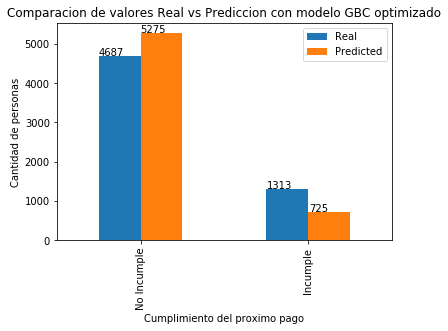

In [134]:
# 6.3. Factor plot of Real vs Predicted

Plot1 = RealvsPredictCount.plot(kind='bar') #customize as you want
plt.xlabel("Cumplimiento del proximo pago")
plt.ylabel("Cantidad de personas")
plt.title("Comparacion de valores Real vs Prediccion con modelo GBC optimizado")
for p in Plot1.patches:
    Plot1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))